In [11]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [12]:
# 2. Load the dataset
# Path to the dataset file
file_path = "heart_disease.csv"
data = pd.read_csv(file_path)

# Display dataset information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      1


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


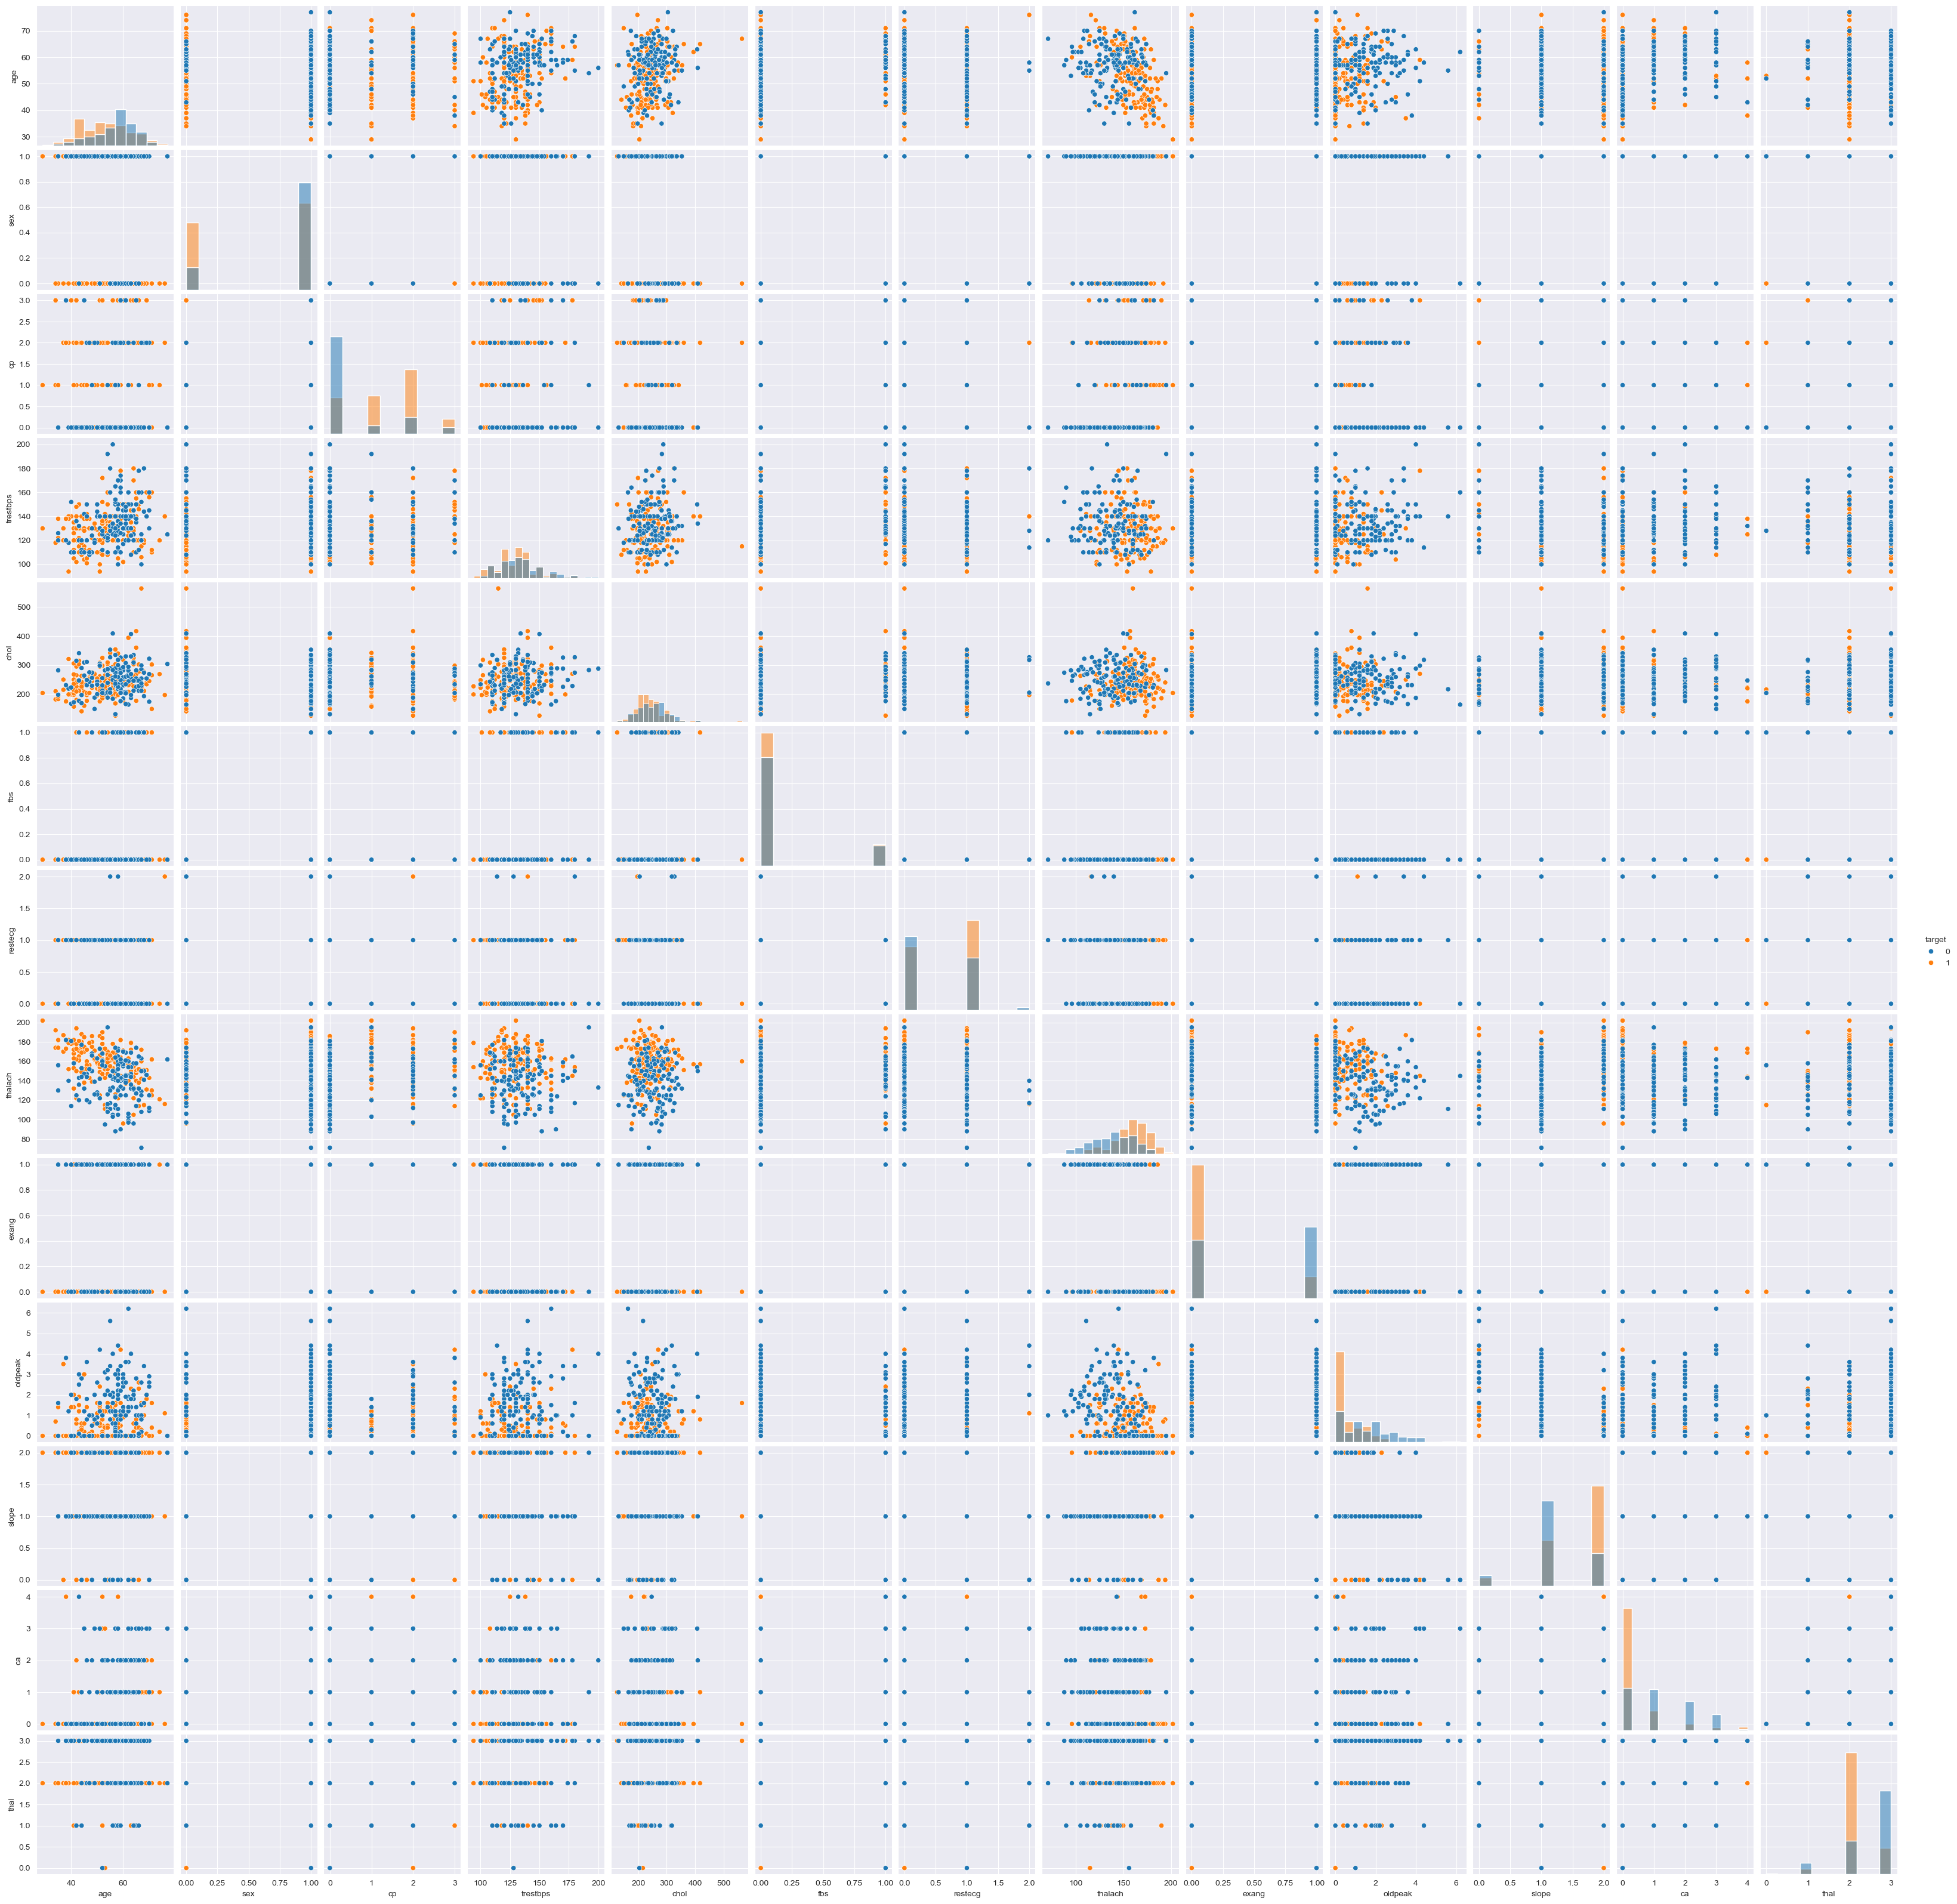

In [13]:
# 3. Data Preprocessing
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Visualize data distribution
sns.pairplot(data, hue="target", diag_kind="hist")
plt.show()

# Separate features (X) and target (y)
X = data.drop(columns=["target"])
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# **4. Build and train the SVM model
model = SVC(kernel="linear", probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



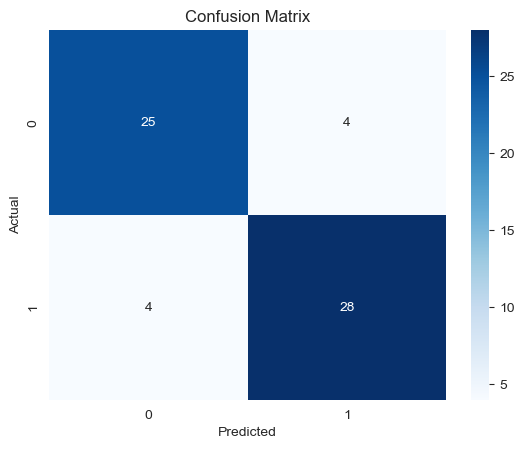

In [15]:
# 5. Model evaluation
# Predict target values for the test set
y_pred = model.predict(X_test)

# Print classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

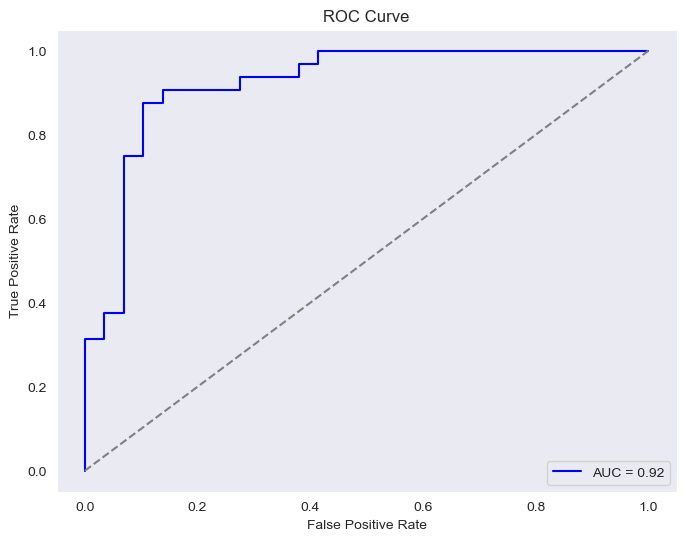

In [16]:
# 6. Plot the ROC Curve
# Compute predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [17]:
# Predict for a new individual
# Example data for a new individual (replace with actual values)
new_data = pd.DataFrame({
    "age": [45],
    "sex": [1],
    "cp": [3],
    "trestbps": [120],
    "chol": [250],
    "fbs": [0],
    "restecg": [1],
    "thalach": [150],
    "exang": [0],
    "oldpeak": [1.2],
    "slope": [2],
    "ca": [0],
    "thal": [2]
})

# Make a prediction
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

# Display results
print("Prediction:", "بیمار" if prediction[0] == 1 else "سالم")
print("Probability of being sick:", f"{probability[0][1] * 100:.2f}%")


Prediction: بیمار
Probability of being sick: 90.44%
